In [3]:
from pyspark.sql import SparkSession

In [5]:
#Initialize Spark Session
spark = SparkSession.builder.appName("NYC_Taxi_Analysis").getOrCreate()

In [22]:
# Load the dataset
df = spark.read.csv('nyc_tlc_green.csv', header=True, inferSchema=True)

In [23]:
# Show the schema of the DataFrame
df.printSchema()

root
 |-- vendorID: integer (nullable = true)
 |-- lpepPickupDatetime: timestamp (nullable = true)
 |-- lpepDropoffDatetime: timestamp (nullable = true)
 |-- passengerCount: integer (nullable = true)
 |-- tripDistance: double (nullable = true)
 |-- puLocationId: integer (nullable = true)
 |-- doLocationId: integer (nullable = true)
 |-- pickupLongitude: string (nullable = true)
 |-- pickupLatitude: string (nullable = true)
 |-- dropoffLongitude: string (nullable = true)
 |-- dropoffLatitude: string (nullable = true)
 |-- rateCodeID: integer (nullable = true)
 |-- storeAndFwdFlag: string (nullable = true)
 |-- paymentType: integer (nullable = true)
 |-- fareAmount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mtaTax: double (nullable = true)
 |-- improvementSurcharge: double (nullable = true)
 |-- tipAmount: double (nullable = true)
 |-- tollsAmount: double (nullable = true)
 |-- ehailFee: string (nullable = true)
 |-- totalAmount: double (nullable = true)
 |-- tri

In [24]:
df.dtypes

[('vendorID', 'int'),
 ('lpepPickupDatetime', 'timestamp'),
 ('lpepDropoffDatetime', 'timestamp'),
 ('passengerCount', 'int'),
 ('tripDistance', 'double'),
 ('puLocationId', 'int'),
 ('doLocationId', 'int'),
 ('pickupLongitude', 'string'),
 ('pickupLatitude', 'string'),
 ('dropoffLongitude', 'string'),
 ('dropoffLatitude', 'string'),
 ('rateCodeID', 'int'),
 ('storeAndFwdFlag', 'string'),
 ('paymentType', 'int'),
 ('fareAmount', 'double'),
 ('extra', 'double'),
 ('mtaTax', 'double'),
 ('improvementSurcharge', 'double'),
 ('tipAmount', 'double'),
 ('tollsAmount', 'double'),
 ('ehailFee', 'string'),
 ('totalAmount', 'double'),
 ('tripType', 'int')]

In [25]:
# Display the first few rows
df.show(5)

+--------+-------------------+-------------------+--------------+------------+------------+------------+---------------+--------------+----------------+---------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+--------+-----------+--------+
|vendorID| lpepPickupDatetime|lpepDropoffDatetime|passengerCount|tripDistance|puLocationId|doLocationId|pickupLongitude|pickupLatitude|dropoffLongitude|dropoffLatitude|rateCodeID|storeAndFwdFlag|paymentType|fareAmount|extra|mtaTax|improvementSurcharge|tipAmount|tollsAmount|ehailFee|totalAmount|tripType|
+--------+-------------------+-------------------+--------------+------------+------------+------------+---------------+--------------+----------------+---------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+--------+-----------+--------+
|       2|2018-05-18 20:32:54|2018-05-18 21:08:10|             1|        6.73|       

In [26]:
from pyspark.sql.functions import col, count, when

In [27]:
# Count NULL values in each column
null_counts = df.select(
    [count(when(col(c).isNull(), c)).alias(c) for c in df.columns]
)
null_counts.show()

+--------+------------------+-------------------+--------------+------------+------------+------------+---------------+--------------+----------------+---------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+--------+-----------+--------+
|vendorID|lpepPickupDatetime|lpepDropoffDatetime|passengerCount|tripDistance|puLocationId|doLocationId|pickupLongitude|pickupLatitude|dropoffLongitude|dropoffLatitude|rateCodeID|storeAndFwdFlag|paymentType|fareAmount|extra|mtaTax|improvementSurcharge|tipAmount|tollsAmount|ehailFee|totalAmount|tripType|
+--------+------------------+-------------------+--------------+------------+------------+------------+---------------+--------------+----------------+---------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+--------+-----------+--------+
|       0|                 0|                  0|             0|           0|           

In [28]:
df = df.drop('pickupLongitude', 'pickupLatitude', 'dropoffLongitude', 'dropoffLatitude', 'ehailFee')
df.show()

+--------+-------------------+-------------------+--------------+------------+------------+------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+
|vendorID| lpepPickupDatetime|lpepDropoffDatetime|passengerCount|tripDistance|puLocationId|doLocationId|rateCodeID|storeAndFwdFlag|paymentType|fareAmount|extra|mtaTax|improvementSurcharge|tipAmount|tollsAmount|totalAmount|tripType|
+--------+-------------------+-------------------+--------------+------------+------------+------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+
|       2|2018-05-18 20:32:54|2018-05-18 21:08:10|             1|        6.73|          74|         107|         1|              N|          2|      26.5|  0.0|   0.5|                 0.3|      0.0|        0.0|       27.3|       1|
|       2|2018-05-25 20:16:31|2018-05-25 20:20:07|             1|       

In [29]:
# Count NULL values again in each column
null_counts = df.select(
    [count(when(col(c).isNull(), c)).alias(c) for c in df.columns]
)
null_counts.show()

+--------+------------------+-------------------+--------------+------------+------------+------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+
|vendorID|lpepPickupDatetime|lpepDropoffDatetime|passengerCount|tripDistance|puLocationId|doLocationId|rateCodeID|storeAndFwdFlag|paymentType|fareAmount|extra|mtaTax|improvementSurcharge|tipAmount|tollsAmount|totalAmount|tripType|
+--------+------------------+-------------------+--------------+------------+------------+------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+
|       0|                 0|                  0|             0|           0|           0|           0|         0|              0|          0|         0|    0|     0|                   0|        0|          0|          0|       0|
+--------+------------------+-------------------+--------------+------------

In [30]:
df.dtypes

[('vendorID', 'int'),
 ('lpepPickupDatetime', 'timestamp'),
 ('lpepDropoffDatetime', 'timestamp'),
 ('passengerCount', 'int'),
 ('tripDistance', 'double'),
 ('puLocationId', 'int'),
 ('doLocationId', 'int'),
 ('rateCodeID', 'int'),
 ('storeAndFwdFlag', 'string'),
 ('paymentType', 'int'),
 ('fareAmount', 'double'),
 ('extra', 'double'),
 ('mtaTax', 'double'),
 ('improvementSurcharge', 'double'),
 ('tipAmount', 'double'),
 ('tollsAmount', 'double'),
 ('totalAmount', 'double'),
 ('tripType', 'int')]

In [16]:
from pyspark.ml.feature import StringIndexer

In [32]:
# Convert categorical columns to numerical
# Initialize the StringIndexer for the 'storeAndFwdFlag' column
indexer = StringIndexer(inputCol="storeAndFwdFlag", outputCol="storeAndFwdFlagIndex")

# Fit the indexer to the DataFrame and transform it
df = indexer.fit(df).transform(df)

# Show the transformed DataFrame with new columns
df.show(5)

+--------+-------------------+-------------------+--------------+------------+------------+------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+--------------------+
|vendorID| lpepPickupDatetime|lpepDropoffDatetime|passengerCount|tripDistance|puLocationId|doLocationId|rateCodeID|storeAndFwdFlag|paymentType|fareAmount|extra|mtaTax|improvementSurcharge|tipAmount|tollsAmount|totalAmount|tripType|storeAndFwdFlagIndex|
+--------+-------------------+-------------------+--------------+------------+------------+------------+----------+---------------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+--------------------+
|       2|2018-05-18 20:32:54|2018-05-18 21:08:10|             1|        6.73|          74|         107|         1|              N|          2|      26.5|  0.0|   0.5|                 0.3|      0.0|        0.0|       27.3|       1|          

In [33]:
# Drop original categorical columns
df = df.drop('storeAndFwdFlag')
df.show()

+--------+-------------------+-------------------+--------------+------------+------------+------------+----------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+--------------------+
|vendorID| lpepPickupDatetime|lpepDropoffDatetime|passengerCount|tripDistance|puLocationId|doLocationId|rateCodeID|paymentType|fareAmount|extra|mtaTax|improvementSurcharge|tipAmount|tollsAmount|totalAmount|tripType|storeAndFwdFlagIndex|
+--------+-------------------+-------------------+--------------+------------+------------+------------+----------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+--------------------+
|       2|2018-05-18 20:32:54|2018-05-18 21:08:10|             1|        6.73|          74|         107|         1|          2|      26.5|  0.0|   0.5|                 0.3|      0.0|        0.0|       27.3|       1|                 0.0|
|       2|2018-05-25 20:16:31|2018-05-25 20:20:07|  

In [34]:
df.dtypes

[('vendorID', 'int'),
 ('lpepPickupDatetime', 'timestamp'),
 ('lpepDropoffDatetime', 'timestamp'),
 ('passengerCount', 'int'),
 ('tripDistance', 'double'),
 ('puLocationId', 'int'),
 ('doLocationId', 'int'),
 ('rateCodeID', 'int'),
 ('paymentType', 'int'),
 ('fareAmount', 'double'),
 ('extra', 'double'),
 ('mtaTax', 'double'),
 ('improvementSurcharge', 'double'),
 ('tipAmount', 'double'),
 ('tollsAmount', 'double'),
 ('totalAmount', 'double'),
 ('tripType', 'int'),
 ('storeAndFwdFlagIndex', 'double')]

In [35]:
from pyspark.sql.functions import hour, month, dayofweek

In [36]:
# Create new columns: hour, month, day of week
df = df.withColumn('hour', hour(df['lpepPickupDatetime']))
df = df.withColumn('month', month(df['lpepPickupDatetime']))
df = df.withColumn('dayofweek', dayofweek(df['lpepPickupDatetime']))

In [37]:
df.show(5)

+--------+-------------------+-------------------+--------------+------------+------------+------------+----------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+--------------------+----+-----+---------+
|vendorID| lpepPickupDatetime|lpepDropoffDatetime|passengerCount|tripDistance|puLocationId|doLocationId|rateCodeID|paymentType|fareAmount|extra|mtaTax|improvementSurcharge|tipAmount|tollsAmount|totalAmount|tripType|storeAndFwdFlagIndex|hour|month|dayofweek|
+--------+-------------------+-------------------+--------------+------------+------------+------------+----------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+--------------------+----+-----+---------+
|       2|2018-05-18 20:32:54|2018-05-18 21:08:10|             1|        6.73|          74|         107|         1|          2|      26.5|  0.0|   0.5|                 0.3|      0.0|        0.0|       27.3|       1|           

In [38]:
# Display summary statistics
df.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+--------------------+------------------+-------------------+------------------+-------------------+--------------------+------------------+------+------------------+
|summary|          vendorID|    passengerCount|      tripDistance|      puLocationId|      doLocationId|        rateCodeID|       paymentType|        fareAmount|             extra|             mtaTax|improvementSurcharge|         tipAmount|        tollsAmount|       totalAmount|           tripType|storeAndFwdFlagIndex|              hour| month|         dayofweek|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+--------------------+------------------+-------------------+--------

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Convert to pandas DataFrame
pandas_df = df.toPandas()

In [41]:
# Convert 'lpepPickupDatetime' and 'lpepDropoffDatetime' to pandas datetime if not already
pandas_df['lpepPickupDatetime'] = pd.to_datetime(pandas_df['lpepPickupDatetime'])
pandas_df['lpepDropoffDatetime'] = pd.to_datetime(pandas_df['lpepDropoffDatetime'])

In [42]:
# Calculate trip duration in seconds
pandas_df['trip_time_in_secs'] = (pandas_df['lpepDropoffDatetime'] - pandas_df['lpepPickupDatetime']).dt.total_seconds()

In [43]:
pandas_df.head()

,vendorID,lpepPickupDatetime,lpepDropoffDatetime,passengerCount,tripDistance,puLocationId,doLocationId,rateCodeID,paymentType,fareAmount,...,improvementSurcharge,tipAmount,tollsAmount,totalAmount,tripType,storeAndFwdFlagIndex,hour,month,dayofweek,trip_time_in_secs
0,2,2018-05-18 20:32:54,2018-05-18 21:08:10,1,6.73,74,107,1,2,26.5,...,0.3,0.0,0.0,27.3,1,0.0,20,5,6,2116.0
1,2,2018-05-25 20:16:31,2018-05-25 20:20:07,1,0.51,166,166,1,2,4.5,...,0.3,0.0,0.0,5.3,1,0.0,20,5,6,216.0
2,2,2018-05-25 20:26:02,2018-05-25 20:41:01,1,2.60,166,75,1,2,12.0,...,0.3,0.0,0.0,12.8,1,0.0,20,5,6,899.0
3,2,2018-05-25 20:45:36,2018-05-25 21:04:26,1,3.04,75,152,1,2,13.5,...,0.3,0.0,0.0,14.3,1,0.0,20,5,6,1130.0
4,2,2018-05-15 14:05:40,2018-05-15 14:17:53,1,1.60,116,243,1,2,10.0,...,0.3,0.0,0.0,10.8,1,0.0,14,5,3,733.0


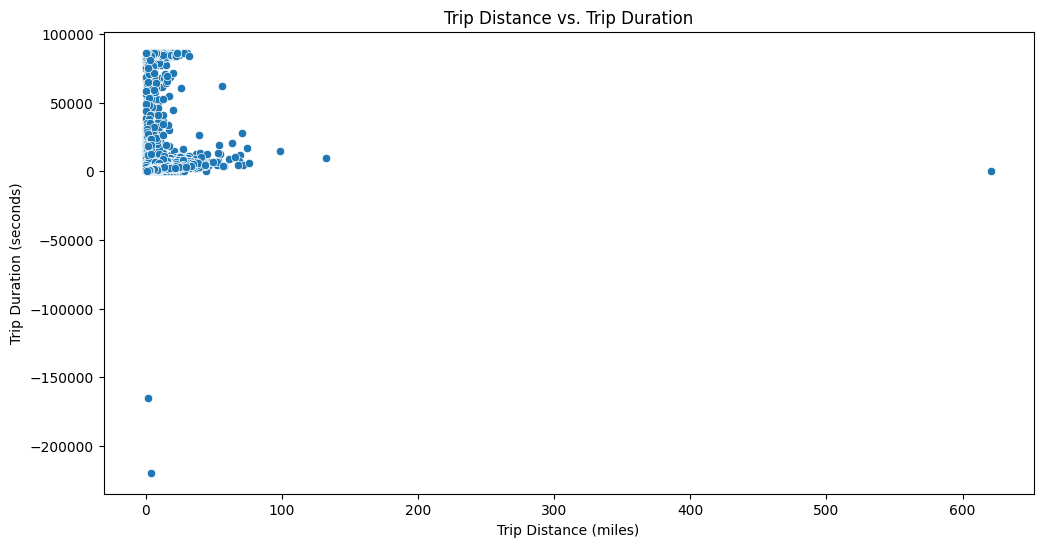

In [44]:
# Scatter plot of trip distance vs. trip duration
plt.figure(figsize=(12, 6))
sns.scatterplot(x='tripDistance', y='trip_time_in_secs', data=pandas_df)
plt.title('Trip Distance vs. Trip Duration')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Trip Duration (seconds)')
plt.show()

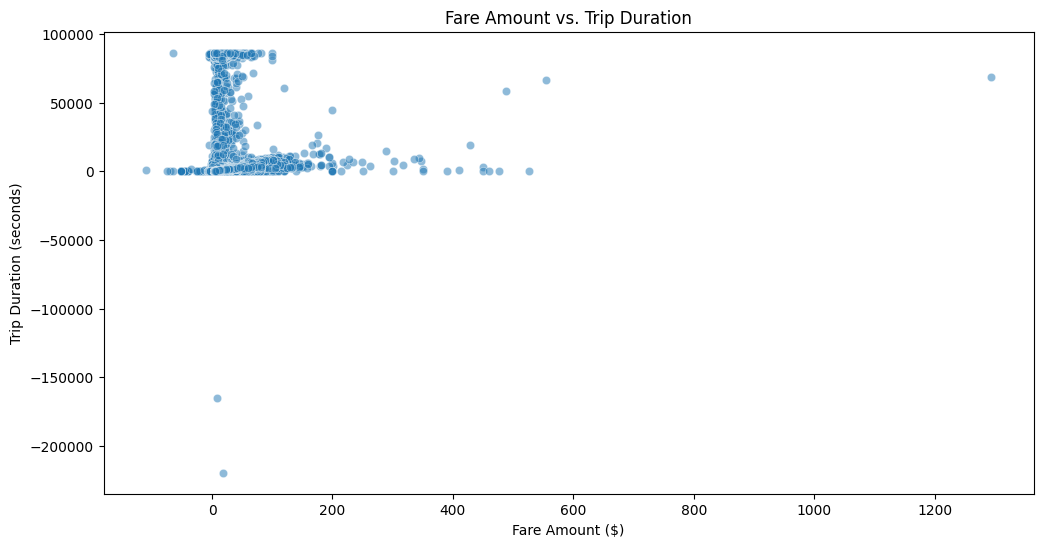

In [45]:
# Scatter plot of fare amount vs. trip duration
plt.figure(figsize=(12, 6))
sns.scatterplot(x='fareAmount', y='trip_time_in_secs', data=pandas_df, alpha=0.5)
plt.title('Fare Amount vs. Trip Duration')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Trip Duration (seconds)')
plt.show()

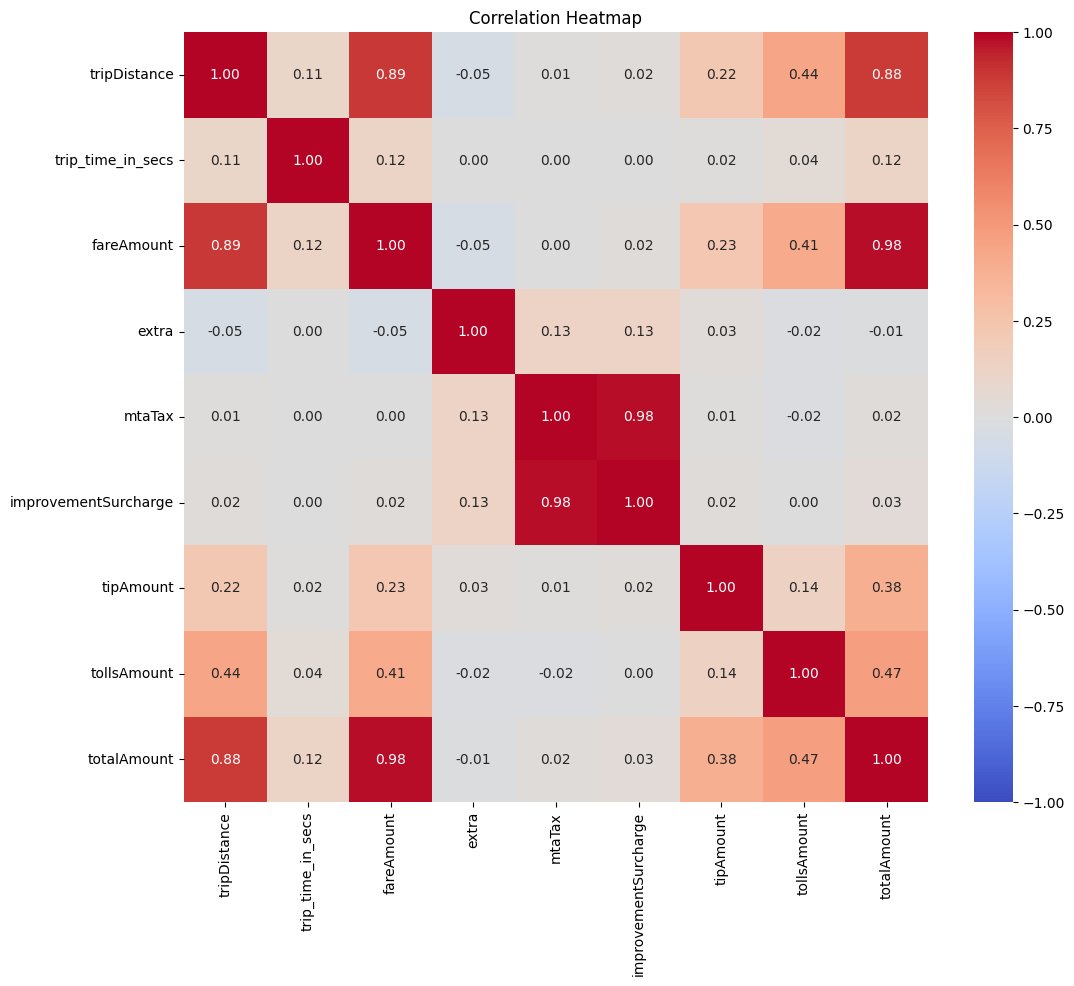

In [46]:
# Compute the correlation matrix
corr = pandas_df[['tripDistance', 'trip_time_in_secs', 'fareAmount', 'extra', 'mtaTax', 'improvementSurcharge', 'tipAmount', 'tollsAmount', 'totalAmount']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [47]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col

In [48]:
# Convert pandas DataFrame to PySpark DataFrame
pandas_df_spark = spark.createDataFrame(pandas_df)

In [49]:
pandas_df_spark.printSchema()

root
 |-- vendorID: long (nullable = true)
 |-- lpepPickupDatetime: timestamp (nullable = true)
 |-- lpepDropoffDatetime: timestamp (nullable = true)
 |-- passengerCount: long (nullable = true)
 |-- tripDistance: double (nullable = true)
 |-- puLocationId: long (nullable = true)
 |-- doLocationId: long (nullable = true)
 |-- rateCodeID: long (nullable = true)
 |-- paymentType: long (nullable = true)
 |-- fareAmount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mtaTax: double (nullable = true)
 |-- improvementSurcharge: double (nullable = true)
 |-- tipAmount: double (nullable = true)
 |-- tollsAmount: double (nullable = true)
 |-- totalAmount: double (nullable = true)
 |-- tripType: long (nullable = true)
 |-- storeAndFwdFlagIndex: double (nullable = true)
 |-- hour: long (nullable = true)
 |-- month: long (nullable = true)
 |-- dayofweek: long (nullable = true)
 |-- trip_time_in_secs: double (nullable = true)



In [50]:
pandas_df_spark.show()

+--------+-------------------+-------------------+--------------+------------+------------+------------+----------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+--------------------+----+-----+---------+-----------------+
|vendorID| lpepPickupDatetime|lpepDropoffDatetime|passengerCount|tripDistance|puLocationId|doLocationId|rateCodeID|paymentType|fareAmount|extra|mtaTax|improvementSurcharge|tipAmount|tollsAmount|totalAmount|tripType|storeAndFwdFlagIndex|hour|month|dayofweek|trip_time_in_secs|
+--------+-------------------+-------------------+--------------+------------+------------+------------+----------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+--------------------+----+-----+---------+-----------------+
|       2|2018-05-18 20:32:54|2018-05-18 21:08:10|             1|        6.73|          74|         107|         1|          2|      26.5|  0.0|   0.5|                 0.3|

In [51]:
# Select the required columns from pandas_df_spark for the join
pandas_df_spark = pandas_df_spark.select('vendorID', 'lpepPickupDatetime', 'lpepDropoffDatetime', 'trip_time_in_secs')

In [52]:
# Perform the join operation
df = df.join(pandas_df_spark, on=['vendorID', 'lpepPickupDatetime', 'lpepDropoffDatetime'], how='inner')

In [53]:
df.show(5)

+--------+-------------------+-------------------+--------------+------------+------------+------------+----------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+--------------------+----+-----+---------+-----------------+
|vendorID| lpepPickupDatetime|lpepDropoffDatetime|passengerCount|tripDistance|puLocationId|doLocationId|rateCodeID|paymentType|fareAmount|extra|mtaTax|improvementSurcharge|tipAmount|tollsAmount|totalAmount|tripType|storeAndFwdFlagIndex|hour|month|dayofweek|trip_time_in_secs|
+--------+-------------------+-------------------+--------------+------------+------------+------------+----------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+--------------------+----+-----+---------+-----------------+
|       1|2018-05-01 00:02:52|2018-05-01 00:10:03|             1|         2.1|         244|          94|         1|          2|       8.5|  0.5|   0.5|                 0.3|

In [54]:
# Rename 'trip_time_in_secs' to 'label'
df = df.withColumnRenamed('trip_time_in_secs', 'label')

In [56]:
# Select features and label
feature_columns = [
    'tripDistance', 'hour', 'month', 'dayofweek', 'puLocationId', 'doLocationId',
    'passengerCount', 'fareAmount', 'extra', 'mtaTax', 'tipAmount', 'tollsAmount',
    'improvementSurcharge', 'totalAmount', 'storeAndFwdFlagIndex'
]
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
df = assembler.transform(df)

In [57]:
df.show()

+--------+-------------------+-------------------+--------------+------------+------------+------------+----------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+--------------------+----+-----+---------+------+--------------------+
|vendorID| lpepPickupDatetime|lpepDropoffDatetime|passengerCount|tripDistance|puLocationId|doLocationId|rateCodeID|paymentType|fareAmount|extra|mtaTax|improvementSurcharge|tipAmount|tollsAmount|totalAmount|tripType|storeAndFwdFlagIndex|hour|month|dayofweek| label|            features|
+--------+-------------------+-------------------+--------------+------------+------------+------------+----------+-----------+----------+-----+------+--------------------+---------+-----------+-----------+--------+--------------------+----+-----+---------+------+--------------------+
|       1|2018-05-01 00:02:52|2018-05-01 00:10:03|             1|         2.1|         244|          94|         1|          2|       8.5|  0.

In [63]:
# Select the label and features
df_lr = df.select("features", col("label"))
df_lr.show()

+--------------------+------+
|            features| label|
+--------------------+------+
|[2.1,0.0,5.0,3.0,...| 431.0|
|[0.5,0.0,5.0,3.0,...| 175.0|
|[1.6,0.0,5.0,3.0,...| 499.0|
|[0.8,0.0,5.0,3.0,...| 247.0|
|[0.0,0.0,5.0,3.0,...|  14.0|
|(15,[0,2,3,4,5,6]...| 667.0|
|[1.0,0.0,5.0,3.0,...| 320.0|
|[0.6,0.0,5.0,3.0,...| 284.0|
|[3.3,0.0,5.0,3.0,...| 777.0|
|[0.6,0.0,5.0,3.0,...| 153.0|
|[1.1,0.0,5.0,3.0,...| 340.0|
|[13.0,0.0,5.0,3.0...|1532.0|
|[3.9,0.0,5.0,3.0,...| 700.0|
|[1.5,0.0,5.0,3.0,...| 366.0|
|[0.4,0.0,5.0,3.0,...| 116.0|
|[3.8,0.0,5.0,3.0,...| 626.0|
|[13.0,0.0,5.0,3.0...|1654.0|
|[10.0,0.0,5.0,3.0...|1560.0|
|[2.4,0.0,5.0,3.0,...| 508.0|
|[5.4,0.0,5.0,3.0,...|1151.0|
+--------------------+------+
only showing top 20 rows



In [64]:
# Split the data into training and test sets
train_df, test_df = df_lr.randomSplit([0.8, 0.2])

In [65]:
train_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(15,[0,1,2,3,4,5]...|123.0|
|(15,[0,1,2,3,4,5]...|588.0|
|(15,[0,1,2,3,4,5,...| 60.0|
|(15,[0,1,2,3,4,5,...|208.0|
|(15,[0,1,2,3,4,5,...| 32.0|
|(15,[0,1,2,3,4,5,...|482.0|
|(15,[0,1,2,3,4,5,...|993.0|
|(15,[0,1,2,3,4,5,...|107.0|
|(15,[0,1,2,3,4,5,...|118.0|
|(15,[0,1,2,3,4,5,...| 84.0|
|(15,[0,1,2,3,4,5,...| 47.0|
|(15,[0,1,2,3,4,5,...| 80.0|
|(15,[0,1,2,3,4,5,...| 70.0|
|(15,[0,1,2,3,4,5,...| 65.0|
|(15,[0,1,2,3,4,5,...| 82.0|
|(15,[0,1,2,3,4,5,...|359.0|
|(15,[0,1,2,3,4,5,...|131.0|
|(15,[0,1,2,3,4,5,...|190.0|
|(15,[0,1,2,3,4,5,...|208.0|
|(15,[0,1,2,3,4,5,...|198.0|
+--------------------+-----+
only showing top 20 rows



In [66]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [67]:
# Initialize Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol='label')

In [68]:
# Train the model
lr_model = lr.fit(train_df)

In [69]:
# Make predictions
lr_predictions = lr_model.transform(test_df)

In [70]:
lr_predictions.show()

+--------------------+-----+------------------+
|            features|label|        prediction|
+--------------------+-----+------------------+
|(15,[0,1,2,3,4,5,...|276.0| 574.7697528012034|
|(15,[0,1,2,3,4,5,...| 58.0| 522.7702943755426|
|(15,[0,1,2,3,4,5,...|305.0| 576.6065595937243|
|(15,[0,1,2,3,4,5,...|386.0|  624.084012002428|
|(15,[0,1,2,3,4,5,...|245.0| 571.1293563962547|
|(15,[0,1,2,3,4,5,...|487.0| 581.6404324749624|
|(15,[0,1,2,3,4,5,...|510.0|  557.310292417316|
|(15,[0,1,2,3,4,5,...|214.0|  452.613282019554|
|(15,[0,1,2,3,4,5,...|309.0| 480.4954238659497|
|(15,[0,1,2,3,4,5,...|362.0| 521.5792891416415|
|(15,[0,1,2,3,4,5,...|531.0| 551.2845968692137|
|(15,[0,1,2,3,4,5,...|491.0| 575.5367053726644|
|(15,[0,1,2,3,4,5,...|751.0| 588.4971020772249|
|(15,[0,1,2,3,4,5,...|580.0| 564.0963279025128|
|(15,[0,1,2,3,4,5,...|522.0| 488.0758979122733|
|(15,[0,1,2,3,4,5,...|398.0| 516.0516910745877|
|(15,[0,1,2,3,4,5,...|443.0| 560.7605113006215|
|(15,[0,1,2,3,4,5,...|466.0|412.85973416

In [71]:
# Evaluate the model
evaluator = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='rmse')
lr_rmse = evaluator.evaluate(lr_predictions)
print(f"Root Mean Squared Error (RMSE) for Linear Regression: {lr_rmse}")

Root Mean Squared Error (RMSE) for Linear Regression: 6027.167489284903


In [72]:
# Convert Spark DataFrame to Pandas DataFrame
lr_predictions_pd = lr_predictions.select('label', 'prediction').toPandas()

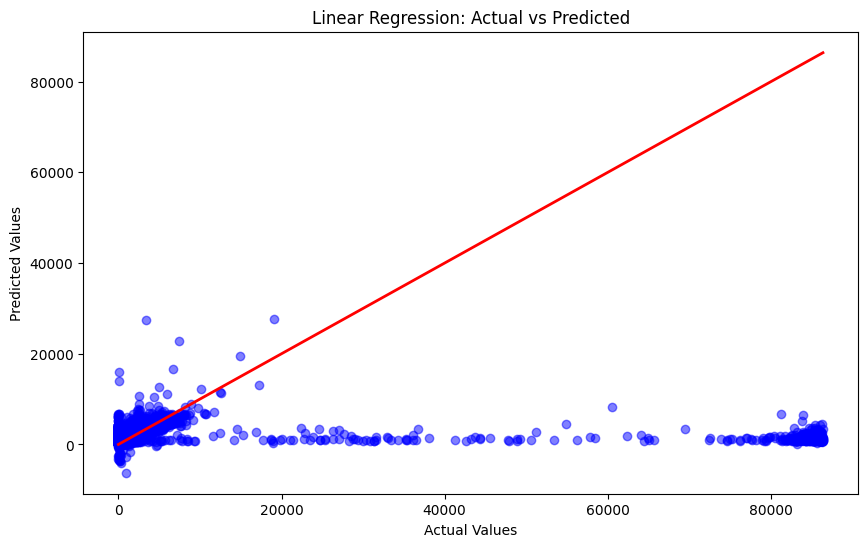

In [77]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(lr_predictions_pd['label'], lr_predictions_pd['prediction'], color='blue', alpha=0.5)
plt.plot([lr_predictions_pd['label'].min(), lr_predictions_pd['label'].max()],
         [lr_predictions_pd['label'].min(), lr_predictions_pd['label'].max()],
         color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


In [78]:
from pyspark.ml.regression import DecisionTreeRegressor

In [79]:
# Initialize Decision Tree Regressor model
dt = DecisionTreeRegressor(featuresCol='features', labelCol='label')

In [80]:
# Train the model
dt_model = dt.fit(train_df)

In [81]:
# Make predictions on test data
dt_predictions = dt_model.transform(test_df)

In [86]:
dt_predictions.show()

+--------------------+-----+-----------------+
|            features|label|       prediction|
+--------------------+-----+-----------------+
|(15,[0,1,2,3,4,5,...|276.0|568.8430915448758|
|(15,[0,1,2,3,4,5,...| 58.0|568.8430915448758|
|(15,[0,1,2,3,4,5,...|305.0|568.8430915448758|
|(15,[0,1,2,3,4,5,...|386.0|568.8430915448758|
|(15,[0,1,2,3,4,5,...|245.0|809.2577288763978|
|(15,[0,1,2,3,4,5,...|487.0|809.2577288763978|
|(15,[0,1,2,3,4,5,...|510.0|809.2577288763978|
|(15,[0,1,2,3,4,5,...|214.0|809.2577288763978|
|(15,[0,1,2,3,4,5,...|309.0|809.2577288763978|
|(15,[0,1,2,3,4,5,...|362.0|809.2577288763978|
|(15,[0,1,2,3,4,5,...|531.0|809.2577288763978|
|(15,[0,1,2,3,4,5,...|491.0|809.2577288763978|
|(15,[0,1,2,3,4,5,...|751.0|809.2577288763978|
|(15,[0,1,2,3,4,5,...|580.0|809.2577288763978|
|(15,[0,1,2,3,4,5,...|522.0|809.2577288763978|
|(15,[0,1,2,3,4,5,...|398.0|809.2577288763978|
|(15,[0,1,2,3,4,5,...|443.0|809.2577288763978|
|(15,[0,1,2,3,4,5,...|466.0|809.2577288763978|
|(15,[0,1,2,3

In [82]:
# Evaluate the model
dt_rmse = evaluator.evaluate(dt_predictions)
print(f"Root Mean Squared Error (RMSE) for Decision Tree Regressor: {dt_rmse}")

Root Mean Squared Error (RMSE) for Decision Tree Regressor: 6031.732417049877


In [87]:
# Convert Spark DataFrame to Pandas DataFrame
dt_predictions_pd = dt_predictions.select('label', 'prediction').toPandas()

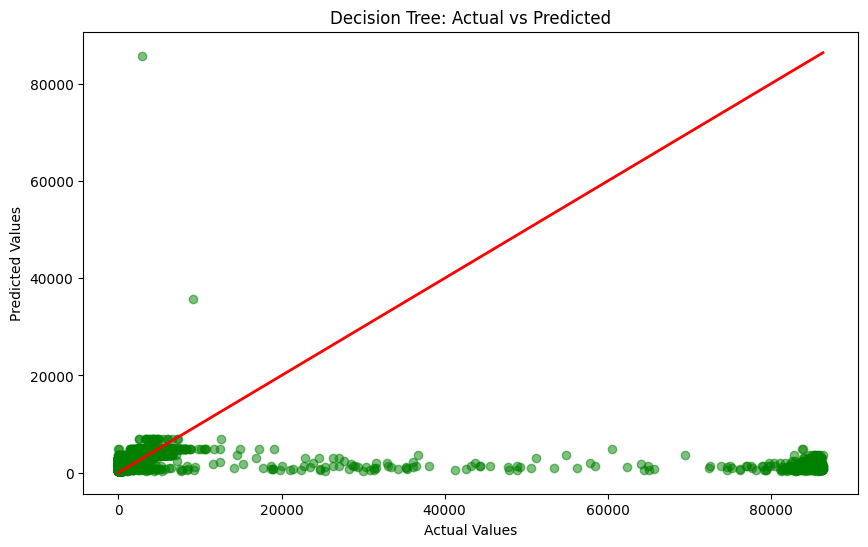

In [88]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(dt_predictions_pd['label'], dt_predictions_pd['prediction'], color='green', alpha=0.5)
plt.plot([dt_predictions_pd['label'].min(), dt_predictions_pd['label'].max()],
         [dt_predictions_pd['label'].min(), dt_predictions_pd['label'].max()],
         color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree: Actual vs Predicted')
plt.show()

In [83]:
from pyspark.ml.regression import RandomForestRegressor

In [84]:
# Initialize Random Forest Regressor model
rf = RandomForestRegressor(featuresCol='features', labelCol='label')

In [89]:
# Train the model
rf_model = rf.fit(train_df)

In [90]:
# Make predictions
rf_predictions = rf_model.transform(test_df)

In [94]:
rf_predictions.show()

+--------------------+-----+-----------------+
|            features|label|       prediction|
+--------------------+-----+-----------------+
|(15,[0,1,2,3,4,5,...|276.0|563.3617249356466|
|(15,[0,1,2,3,4,5,...| 58.0|554.2657665257541|
|(15,[0,1,2,3,4,5,...|305.0|638.0633374679688|
|(15,[0,1,2,3,4,5,...|386.0|610.1893484187963|
|(15,[0,1,2,3,4,5,...|245.0|580.8143373495429|
|(15,[0,1,2,3,4,5,...|487.0|608.4713878013251|
|(15,[0,1,2,3,4,5,...|510.0|606.8593982756909|
|(15,[0,1,2,3,4,5,...|214.0|628.9818005042846|
|(15,[0,1,2,3,4,5,...|309.0|606.8593982756909|
|(15,[0,1,2,3,4,5,...|362.0|606.8593982756909|
|(15,[0,1,2,3,4,5,...|531.0|628.2074018712102|
|(15,[0,1,2,3,4,5,...|491.0|844.8903767765893|
|(15,[0,1,2,3,4,5,...|751.0|812.8141377201807|
|(15,[0,1,2,3,4,5,...|580.0|812.8141377201807|
|(15,[0,1,2,3,4,5,...|522.0|824.2006434747143|
|(15,[0,1,2,3,4,5,...|398.0|777.9778416859153|
|(15,[0,1,2,3,4,5,...|443.0|812.8141377201807|
|(15,[0,1,2,3,4,5,...|466.0|800.3664038930356|
|(15,[0,1,2,3

In [91]:
# Evaluate the model
rf_rmse = evaluator.evaluate(rf_predictions)
print(f"Root Mean Squared Error (RMSE) for Random Forest Regressor: {rf_rmse}")

Root Mean Squared Error (RMSE) for Random Forest Regressor: 6023.314605480357


In [92]:
# Convert Spark DataFrame to Pandas DataFrame
rf_predictions_pd = rf_predictions.select('label', 'prediction').toPandas()

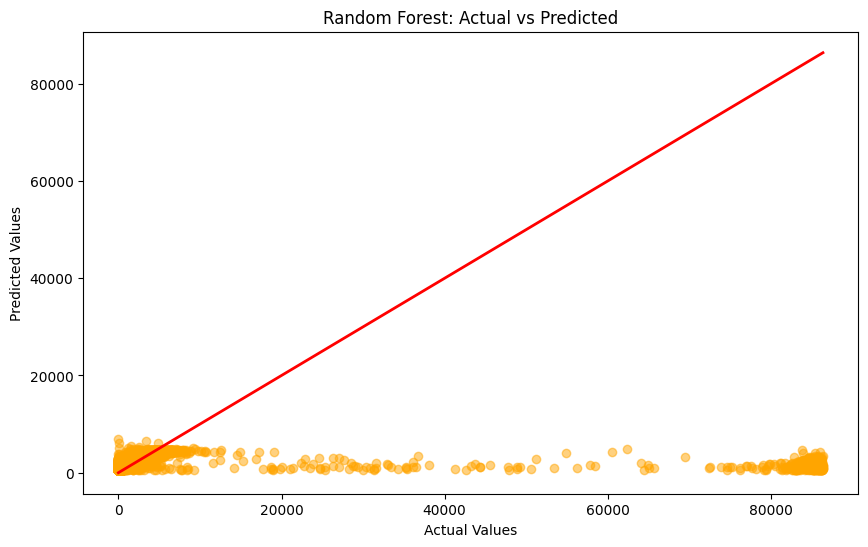

In [93]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rf_predictions_pd['label'], rf_predictions_pd['prediction'], color='orange', alpha=0.5)
plt.plot([rf_predictions_pd['label'].min(), rf_predictions_pd['label'].max()],
         [rf_predictions_pd['label'].min(), rf_predictions_pd['label'].max()],
         color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

In [100]:
# Compare the performance of the models
print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Decision Tree RMSE: {dt_rmse}")
print(f"Random Forest RMSE: {rf_rmse}")

Linear Regression RMSE: 6027.167489284903
Decision Tree RMSE: 6031.732417049877
Random Forest RMSE: 6023.314605480357


In [101]:
# Choose the best model based on RMSE
best_model = 'Linear Regression' if lr_rmse < dt_rmse and lr_rmse < rf_rmse else 'Decision Tree' if dt_rmse < lr_rmse and dt_rmse < rf_rmse else 'Random Forest'
print(f"The best model is: {best_model}")

The best model is: Random Forest
